## Q3 (10 points)
เขียนคลาส Bank ในส่วนที่กำหนดให้สมบูรณ์ โดยมีฟังก์ชันต่อไปนี้
- `create_accounts(self,profiles)` ฟังก์ชันสำหรับการสร้างบัญชีธนาคาร (accounts) ตาม dictionary ที่ชื่อ profiles โดย accounts มี key เป็น ชื่อบัญชี ซึ่งเป็น key ของ profiles หนึ่ง ๆ และมี value เป็นชนิด Account ที่มียอดเงินเริ่มต้น (initial_balance) เท่ากับ value ของ profiles ที่ตรงกับชื่อบัญชีนั้น ๆ เช่น 
    - ถ้า profiles มีค่าเป็น {'Carol':1000,'Marta':-100} ดังนั้น accounts ที่เป็น dictionary ของคลาส Bank จะมีค่าเป็น {'Carol':Account object ที่มี initial_balance เป็น 1000,'Marta':Account object ที่มี initial_balance เป็น -100}
- `transfer(self,from_who,to_who,amt)` ฟังก์ชันสำหรับการโอนเงินจากบัญชีชื่อ from_who ไปที่บัญชีชื่อ to_who ด้วยจำนวน amt
- `get_names_in_debt(self)` ฟังก์ชันนี้คืนค่าเป็นลิสต์ของรายชื่อที่ติดหนี้กับธนาคาร นั่นคือยอดเงินในบัญชีติดลบ
- `update_with_interest(self)` ฟังก์ชันสำหรับการอัพเดททุกบัญชีในธนาคารด้วยการคิดดอกเบี้ยเงินฝากและดอกเบี้ยเงินกู้

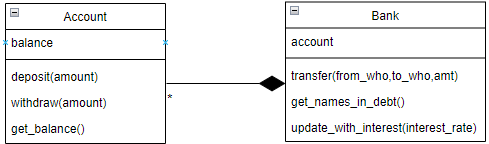

In [1]:
class Account:
    def __init__(self, initial_balance=0):
        self.__balance = initial_balance

    def deposit(self, amount):
        self.__balance += amount

    def withdraw(self, amount):
        self.__balance -= amount        

    def get_balance(self):
        return self.__balance

In [2]:
class Bank:
    def __init__(self, profiles):
        self.accounts = {}
        for name, initial_balance in profiles.items():
            self.accounts[name] = Account(initial_balance)

    def transfer(self, from_who, to_who, amt):
        if from_who in self.accounts and to_who in self.accounts:
            self.accounts[from_who].withdraw(amt)
            self.accounts[to_who].deposit(amt)

    def get_names_in_debt(self):
        debt = []
        for name, account in self.accounts.items():
            if account.get_balance() < 0:
                debt.append(name)
        return debt

    def update_with_interest(self, interest_rate):
        for name, account in self.accounts.items():
            interest = (account.get_balance() * interest_rate) / 100
            account.deposit(interest)

In [3]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-100})
assert csBank.accounts['Carol'].get_balance() == 1000
assert csBank.accounts['Marta'].get_balance() == -100

In [4]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-100})
csBank.transfer('Carol','Marta',500)
assert csBank.accounts['Carol'].get_balance() == 500
assert csBank.accounts['Marta'].get_balance() == 400

In [5]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-100})
assert csBank.get_names_in_debt() == ['Marta']

In [6]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-500})
csBank.update_with_interest(1.5)
assert csBank.accounts['Carol'].get_balance() == 1015
assert csBank.accounts['Marta'].get_balance() == -507.5,  csBank.accounts['Marta'].get_balance()